In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fulldata = pd.read_csv('cleaned_data.csv')
fulldata.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
1,25,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10175.949000,high,The Devil Inside (2012),tt1560985,The Devil Inside,The Devil Inside,2012.0,83.0,Horror
2,51,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5917.067733,high,Paranormal Activity 2 (2010),tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010.0,91.0,Horror
3,59,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,high,Get Out (2017),tt5052448,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller"
4,65,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4349.700800,high,Moonlight (2016),tt4975722,Moonlight,Moonlight,2016.0,111.0,Drama


In [3]:
piv0 = pd.pivot_table(fulldata, index='genres', values='id', aggfunc='count')
piv0 = piv0.sort_values(by='id', ascending=False).reset_index()
piv0.index.name = 'genre_rank'
piv0 = piv0.reset_index()
piv0.head()

,genre_rank,genres,id
0,0,"Adventure,Animation,Comedy",67
1,1,Drama,63
2,2,Comedy,55
3,3,"Action,Adventure,Sci-Fi",52
4,4,"Comedy,Drama,Romance",52


In [4]:
piv1 = pd.pivot_table(fulldata, index=['roi_category','genres'], values ='id', aggfunc='count')
piv1

id
roi_category genres                        
high         Action,Adventure,Animation   2
             Action,Adventure,Comedy      5
             Action,Adventure,Drama       1
             Action,Adventure,Fantasy     2
             Action,Adventure,Horror      1
             Action,Adventure,Sci-Fi     15
             Action,Adventure,Thriller    1
             Action,Animation,Comedy      1
             Action,Biography,Drama       2
             Action,Comedy,Crime          5
             Action,Comedy,Documentary    1
             Action,Comedy,Drama          1
             Action,Crime,Drama           4
             Action,Crime,Thriller        3
             Action,Drama                 1
             Action,Drama,Family          1
             Action,Drama,Sci-Fi          2
             Action,Drama,Sport           1
             Action,Horror,Sci-Fi         3
             Action,Mystery,Sci-Fi        1
             Action,Sci-Fi,Thriller       5
             Action,Thriller              2
             Adventure,Animation,Comedy  17
             Adventure,Biography,Comedy   1
             Adventure,Biography,Drama    1
             Adventure,Comedy,Crime       2
             Adventure,Comedy,Drama       1
             Adventure,Drama,Family       1
             Adventure,Drama,Fantasy      4
             Adventure,Drama,Sci-Fi       1
...                                      ..
somewhat low Documentary                  7
             Documentary,Sport            1
             Drama                        8
             Drama,Family                 1
             Drama,Family,Sport           2
             Drama,Fantasy                2
             Drama,Fantasy,Horror         4
             Drama,Fantasy,Romance        3
             Drama,History,War            2
             Drama,Horror,Mystery         1
             Drama,Horror,Sci-Fi          1
             Drama,Horror,Thriller        1
             Drama,Music                  3
             Drama,Music,Thriller         1
             Drama,Mystery,Sci-Fi         3
             Drama,Mystery,Thriller       4
             Drama,Romance                5
             Drama,Romance,Sci-Fi         2
             Drama,Sci-Fi                 1
             Drama,Sport                  4
             Drama,Thriller               4
             Drama,War                    1
             Drama,Western                1
             Family,Horror,Romance        1
             Fantasy                      1
             Horror                       1
             Horror,Mystery,Sci-Fi        1
             Horror,Mystery,Thriller      1
             Horror,Thriller              6
             Music                        1

[557 rows x 1 columns]

In [5]:
piv2 = piv1.groupby(['roi_category']).agg({'id': 'sum'})
piv2

,id
roi_category,
high,304
low,304
moderate,303
somewhat high,303
somewhat low,303


In [6]:
piv3 = piv1.div(piv2, level='roi_category')*100
piv3.groupby(['roi_category']).agg({'id': 'sum'})
piv3

id
roi_category genres                              
high         Action,Adventure,Animation  0.657895
             Action,Adventure,Comedy     1.644737
             Action,Adventure,Drama      0.328947
             Action,Adventure,Fantasy    0.657895
             Action,Adventure,Horror     0.328947
             Action,Adventure,Sci-Fi     4.934211
             Action,Adventure,Thriller   0.328947
             Action,Animation,Comedy     0.328947
             Action,Biography,Drama      0.657895
             Action,Comedy,Crime         1.644737
             Action,Comedy,Documentary   0.328947
             Action,Comedy,Drama         0.328947
             Action,Crime,Drama          1.315789
             Action,Crime,Thriller       0.986842
             Action,Drama                0.328947
             Action,Drama,Family         0.328947
             Action,Drama,Sci-Fi         0.657895
             Action,Drama,Sport          0.328947
             Action,Horror,Sci-Fi        0.986842
             Action,Mystery,Sci-Fi       0.328947
             Action,Sci-Fi,Thriller      1.644737
             Action,Thriller             0.657895
             Adventure,Animation,Comedy  5.592105
             Adventure,Biography,Comedy  0.328947
             Adventure,Biography,Drama   0.328947
             Adventure,Comedy,Crime      0.657895
             Adventure,Comedy,Drama      0.328947
             Adventure,Drama,Family      0.328947
             Adventure,Drama,Fantasy     1.315789
             Adventure,Drama,Sci-Fi      0.328947
...                                           ...
somewhat low Documentary                 2.310231
             Documentary,Sport           0.330033
             Drama                       2.640264
             Drama,Family                0.330033
             Drama,Family,Sport          0.660066
             Drama,Fantasy               0.660066
             Drama,Fantasy,Horror        1.320132
             Drama,Fantasy,Romance       0.990099
             Drama,History,War           0.660066
             Drama,Horror,Mystery        0.330033
             Drama,Horror,Sci-Fi         0.330033
             Drama,Horror,Thriller       0.330033
             Drama,Music                 0.990099
             Drama,Music,Thriller        0.330033
             Drama,Mystery,Sci-Fi        0.990099
             Drama,Mystery,Thriller      1.320132
             Drama,Romance               1.650165
             Drama,Romance,Sci-Fi        0.660066
             Drama,Sci-Fi                0.330033
             Drama,Sport                 1.320132
             Drama,Thriller              1.320132
             Drama,War                   0.330033
             Drama,Western               0.330033
             Family,Horror,Romance       0.330033
             Fantasy                     0.330033
             Horror                      0.330033
             Horror,Mystery,Sci-Fi       0.330033
             Horror,Mystery,Thriller     0.330033
             Horror,Thriller             1.980198
             Music                       0.330033

[557 rows x 1 columns]

In [7]:
piv4 = piv3.reset_index()

In [8]:
mergeGenrePiv = piv4.merge(piv0, how="left", left_on='genres', right_on='genres')
mergeGenrePiv.columns = ['roi_category', 'genres', '% of total by roi_cat', 'genre_rank', 'genre_count']
mergeGenrePiv

,roi_category,genres,% of total by roi_cat,genre_rank,genre_count
0,high,"Action,Adventure,Animation",0.657895,25,15
1,high,"Action,Adventure,Comedy",1.644737,18,22
2,high,"Action,Adventure,Drama",0.328947,13,28
3,high,"Action,Adventure,Fantasy",0.657895,12,31
4,high,"Action,Adventure,Horror",0.328947,99,3
5,high,"Action,Adventure,Sci-Fi",4.934211,3,52
6,high,"Action,Adventure,Thriller",0.328947,30,13
7,high,"Action,Animation,Comedy",0.328947,65,5
8,high,"Action,Biography,Drama",0.657895,49,7
9,high,"Action,Comedy,Crime",1.644737,10,31


In [9]:
viz1 = mergeGenrePiv.loc[mergeGenrePiv['genre_rank'] < 10]
viz1.head()

,roi_category,genres,% of total by roi_cat,genre_rank,genre_count
5,high,"Action,Adventure,Sci-Fi",4.934211,3,52
12,high,"Action,Crime,Drama",1.315789,7,39
22,high,"Adventure,Animation,Comedy",5.592105,0,67
45,high,Comedy,1.644737,2,55
49,high,"Comedy,Drama",4.276316,5,48


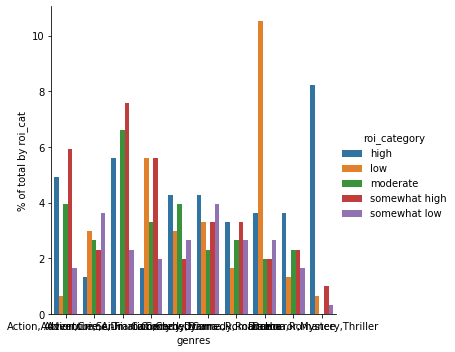

In [10]:
sns.catplot(x='genres', y='% of total by roi_cat', hue='roi_category', data=viz1, kind='bar')
            

### Stacked Bar v2

In [11]:
viz2 = mergeGenrePiv.loc[(mergeGenrePiv['genre_rank'] < 10) & (mergeGenrePiv['roi_category'] == 'high')]
viz2

,roi_category,genres,% of total by roi_cat,genre_rank,genre_count
5,high,"Action,Adventure,Sci-Fi",4.934211,3,52
12,high,"Action,Crime,Drama",1.315789,7,39
22,high,"Adventure,Animation,Comedy",5.592105,0,67
45,high,Comedy,1.644737,2,55
49,high,"Comedy,Drama",4.276316,5,48
55,high,"Comedy,Drama,Romance",4.276316,4,52
64,high,"Comedy,Romance",3.289474,6,41
72,high,Drama,3.618421,1,63
85,high,"Drama,Romance",3.618421,8,34
98,high,"Horror,Mystery,Thriller",8.223684,9,31


In [12]:
piv5 = pd.pivot_table(fulldata.loc[fulldata['roi_category'] != 'high'], index='genres', values ='id', aggfunc='count')
piv5

,id
genres,
Action,2
"Action,Adventure",1
"Action,Adventure,Animation",13
"Action,Adventure,Biography",4
"Action,Adventure,Comedy",17
"Action,Adventure,Crime",10
"Action,Adventure,Drama",27
"Action,Adventure,Family",6
"Action,Adventure,Fantasy",29


In [13]:
piv6 = piv5.agg({'id': 'sum'})
piv6

id    1213
dtype: int64

In [14]:
piv7 = piv5.div(1213) * 100
piv7.head()

,id
genres,
Action,0.164880
"Action,Adventure",0.082440
"Action,Adventure,Animation",1.071723
"Action,Adventure,Biography",0.329761
"Action,Adventure,Comedy",1.401484


In [15]:
mergeGenrePiv2 = piv7.merge(piv0, how="left", left_on='genres', right_on='genres')
mergeGenrePiv2.columns = ['genres', '% of total by roi_cat', 'genre_rank', 'genre_count']
mergeGenrePiv2

,genres,% of total by roi_cat,genre_rank,genre_count
0,Action,0.164880,129,2
1,"Action,Adventure",0.082440,214,1
2,"Action,Adventure,Animation",1.071723,25,15
3,"Action,Adventure,Biography",0.329761,76,4
4,"Action,Adventure,Comedy",1.401484,18,22
5,"Action,Adventure,Crime",0.824402,38,10
6,"Action,Adventure,Drama",2.225886,13,28
7,"Action,Adventure,Family",0.494641,56,6
8,"Action,Adventure,Fantasy",2.390767,12,31
9,"Action,Adventure,Horror",0.164880,99,3


In [16]:
viz3 = mergeGenrePiv2.loc[(mergeGenrePiv2['genre_rank'] < 10)]
viz3

,genres,% of total by roi_cat,genre_rank,genre_count
12,"Action,Adventure,Sci-Fi",3.050289,3,52
30,"Action,Crime,Drama",2.885408,7,39
60,"Adventure,Animation,Comedy",4.122012,0,67
103,Comedy,4.122012,2,55
110,"Comedy,Drama",2.885408,5,48
117,"Comedy,Drama,Romance",3.215169,4,52
136,"Comedy,Romance",2.555647,6,41
157,Drama,4.286892,1,63
183,"Drama,Romance",1.896125,8,34
202,"Horror,Mystery,Thriller",0.494641,9,31


In [17]:
viz4 = viz2.append(viz3)
viz4 = viz4.fillna('other')
viz4

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,% of total by roi_cat,genre_count,genre_rank,genres,roi_category
5,4.934211,52,3,"Action,Adventure,Sci-Fi",high
12,1.315789,39,7,"Action,Crime,Drama",high
22,5.592105,67,0,"Adventure,Animation,Comedy",high
45,1.644737,55,2,Comedy,high
49,4.276316,48,5,"Comedy,Drama",high
55,4.276316,52,4,"Comedy,Drama,Romance",high
64,3.289474,41,6,"Comedy,Romance",high
72,3.618421,63,1,Drama,high
85,3.618421,34,8,"Drama,Romance",high
98,8.223684,31,9,"Horror,Mystery,Thriller",high


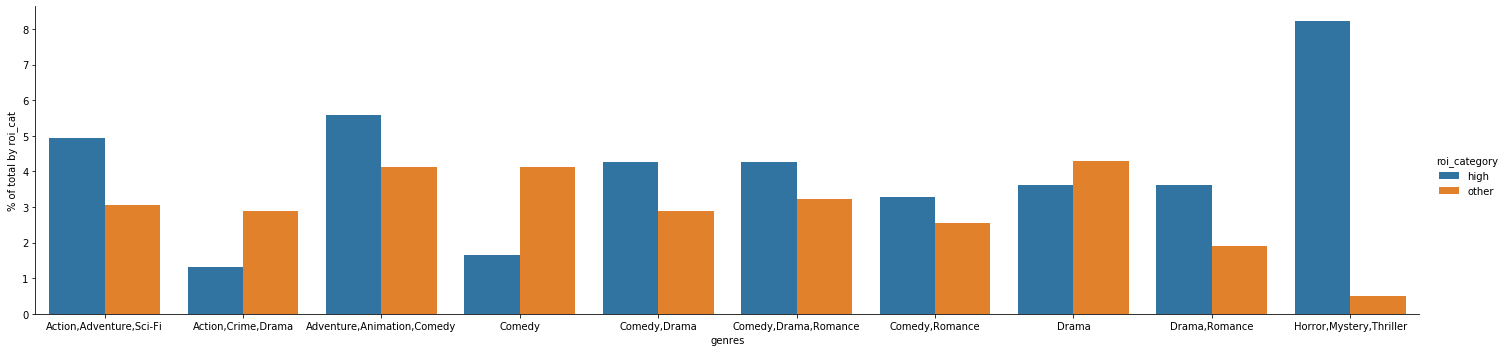

In [18]:
sns.catplot(x='genres', y='% of total by roi_cat', hue='roi_category', data=viz4, kind='bar', aspect=4);